# **ECONOMETRICS NB** 
## Thomas de Portzamparc 27 october 2025

We use the previously loaded data in the data module to do some econometrics

In [44]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import statsmodels.api as sm

In [39]:
def load_data(file_path):
    data = pd.read_csv(file_path, index_col=0, parse_dates=True)
    return data
file_path = "../data/market_data_full_D.csv"
df = load_data(file_path)

print(df.info())
df.head()
# # Scatter Matrix -> commented out because very long to run
# scatter_matrix(df[['Y', 'X', 'INF', 'TS', 'DI', 'DP', 'DM', 'DC', 'DS', 'DT']], figsize=(12, 8))

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 704 entries, 2023-01-04 to 2025-10-23
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   AAPL        704 non-null    float64
 1   SPY         704 non-null    float64
 2   QQQ         704 non-null    float64
 3   XLK         704 non-null    float64
 4   TLT         704 non-null    float64
 5   VIXY        704 non-null    float64
 6   GLD         704 non-null    float64
 7   UUP         704 non-null    float64
 8   INF         704 non-null    float64
 9   DP          704 non-null    float64
 10  DM          704 non-null    float64
 11  DC          704 non-null    float64
 12  DS          704 non-null    float64
 13  TS          704 non-null    float64
 14  DT          704 non-null    float64
 15  RF_daily    704 non-null    float64
 16  RF_monthly  704 non-null    float64
dtypes: float64(17)
memory usage: 99.0 KB
None


,AAPL,SPY,QQQ,XLK,TLT,VIXY,GLD,UUP,INF,DP,DM,DC,DS,TS,DT,RF_daily,RF_monthly
2023-01-04,0.989930,0.740192,0.479020,0.291687,1.380142,10.99,0.925313,-0.356253,0.010948,-0.019322,-0.023620,0.007135,0.04,-3.650645,-0.003548,0.017661,0.371534
2023-01-05,-1.081866,-1.155840,-1.585348,-1.985603,0.388086,11.08,-1.223934,0.817492,0.010947,-0.019326,-0.023626,0.007135,0.01,-3.704194,-0.053548,0.017674,0.371817
2023-01-06,3.559039,2.259821,2.689257,2.895688,1.832625,10.81,1.836087,-1.157111,0.010946,-0.019330,-0.023631,0.007134,-0.02,-3.647742,0.056452,0.017688,0.372101
2023-01-09,0.477401,-0.028354,0.645451,1.139954,0.507363,10.88,0.221414,-0.664693,0.010942,-0.019341,-0.023648,0.007133,-0.01,-3.678387,-0.010215,0.017728,0.372953
2023-01-10,0.429251,0.693644,0.894490,0.616359,-1.674058,10.42,0.366983,0.072072,0.010941,-0.019345,-0.023654,0.007132,-0.01,-3.671935,0.006452,0.017742,0.373237


### **Dataset Overview**

This dataset contains **704 daily observations** from **January 4, 2023 to October 23, 2025**, combining both **financial market data** and **macroeconomic indicators**.

It integrates equity, fixed income, volatility, commodity, and currency information with key macro-financial variables derived from the U.S. Federal Reserve (FRED).
Each row represents a **single trading day**, and each column corresponds to a **specific asset return or macroeconomic feature**.

---

### **1. Market Variables (Columns 0–7)**

These represent **daily returns** (or price changes) for major U.S. financial instruments retrieved from **Alpaca’s IEX feed**.

| Column   | Description                                                                       | Category      |
| :------- | :-------------------------------------------------------------------------------- | :------------ |
| **AAPL** | Apple Inc. stock – a representative single equity (underlying asset).             | Equity        |
| **SPY**  | S&P 500 ETF – proxy for the broad U.S. equity market.                             | Market index  |
| **QQQ**  | Nasdaq-100 ETF – tech-heavy U.S. market benchmark.                                | Equity / Tech |
| **XLK**  | Technology Select Sector SPDR ETF – focused on U.S. technology sector.            | Sector ETF    |
| **TLT**  | iShares 20+ Year Treasury Bond ETF – proxy for long-term U.S. Treasury yields.    | Fixed Income  |
| **VIXY** | Short-Term VIX Futures ETF – captures market volatility expectations.             | Volatility -> Here it's not a return, it gives better information in this way to "classify" the market dynamic |
| **GLD**  | SPDR Gold Shares ETF – proxy for gold prices, often a safe-haven asset.           | Commodity     |
| **UUP**  | Invesco US Dollar Index ETF – reflects USD strength relative to major currencies. | FX / Currency |

These assets cover multiple **systematic risk factors** (equity, duration, inflation, volatility, and currency exposure).

---

### **2. Macroeconomic Variables (Columns 8–16)**

These indicators are constructed from **FRED time series**, interpolated to daily frequency, and measure **inflation, monetary conditions, credit, and yield spreads**.

| Column         | Definition                                                  | Economic Meaning                                                        |
| :------------- | :---------------------------------------------------------- | :---------------------------------------------------------------------- |
| **INF**        | Monthly change in CPI (log-difference ×100).                | Inflation rate – consumer price dynamics.                               |
| **DP**         | Monthly change in Producer Price Index (PPI).               | Inflation from producers’ perspective (input costs).                    |
| **DM**         | Growth rate of M1 money supply.                             | Monetary expansion (liquidity conditions).                              |
| **DC**         | Growth rate of total consumer credit.                       | Credit growth – measures borrowing and leverage in the economy.         |
| **DS**         | Change in the BAA–AAA corporate bond spread.                | Credit spread variation – proxy for credit risk and financial stress.   |
| **TS**         | Term spread (AAA yield − 3-month T-bill rate).              | Slope of the yield curve – expectations about future growth and policy. |
| **DT**         | Change in the term spread.                                  | Dynamic of the yield curve (monetary tightening or easing).             |
| **RF_daily**   | Dailyized risk-free rate derived from 3-month T-bill yield. | Short-term rate proxy for daily frequency models.                       |
| **RF_monthly** | Monthly equivalent of the same risk-free rate.              | For portfolio optimization or CAPM-style modeling.                      |

These variables form a **macro-financial state vector**, capturing both real economy (inflation, credit, liquidity) and financial market conditions (rates, spreads, volatility).

---

### **Interpretation**

* The **market block (AAPL–UUP)** reflects **cross-asset performance** — equities, bonds, commodities, and currencies.
* The **macro block (INF–RF_monthly)** captures **the underlying economic environment**, useful for modeling **risk premia, asset pricing factors, or macro-driven strategies**.
* Together, they create a unified dataset suitable for:

  * **Factor modeling** (e.g., macro-based asset pricing),
  * **Machine learning forecasting** (returns conditional on macro states),
  * **Regime detection or PCA analysis**, and
  * **Portfolio risk decomposition**.



/var/folders/3l/s4t1bsn973dfhyz_6q842jr00000gn/T/ipykernel_57192/431756597.py:43: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_stat, kpss_p, _, _ = kpss(series, regression='c', nlags='auto')


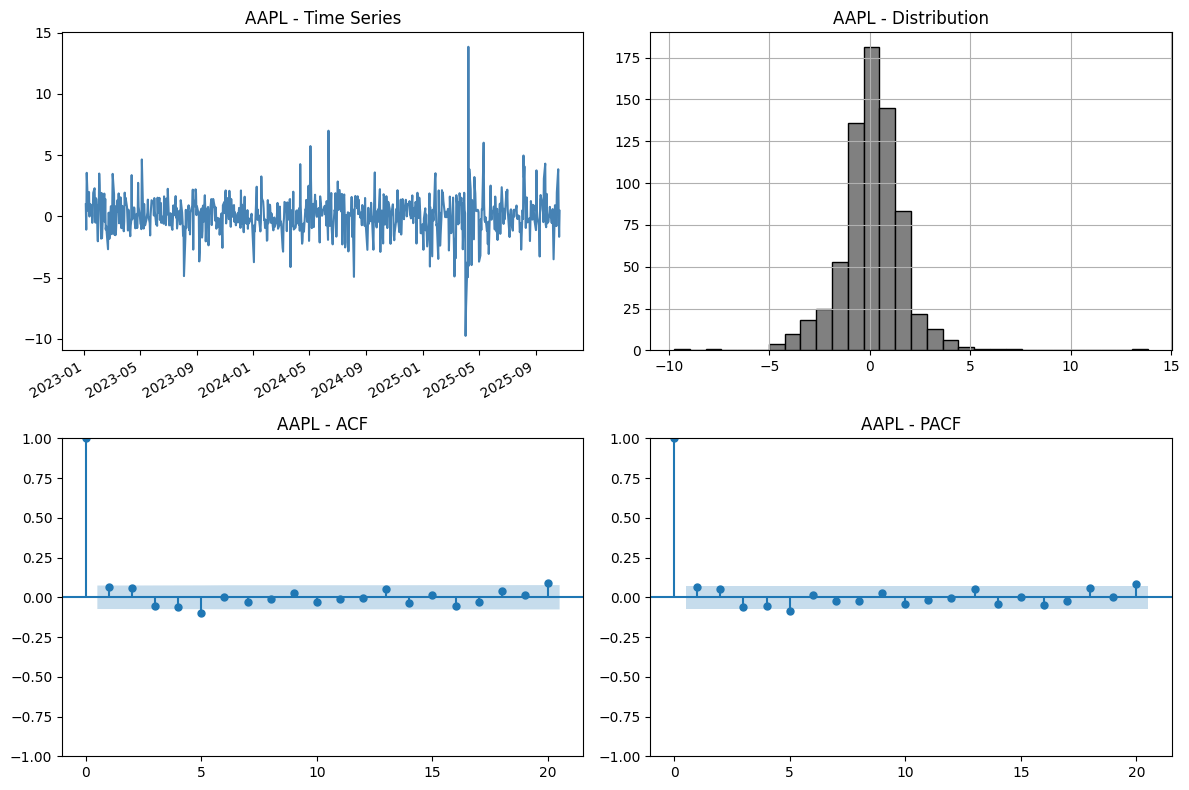

Normality test (Jarque–Bera): p = 0.0
Stationarity tests:
 - ADF p-value = 0.0000 (H0: non-stationary)
 - KPSS p-value = 0.1000 (H0: stationary)
Lag-1 autocorrelation = 0.062
Lag-5 autocorrelation = -0.100
      count      mean       std       var       min        max  skewness  \
AAPL  704.0  0.103641  1.631036  2.660279 -9.749756  13.845271  0.438027   

       kurtosis  jarque_bera_p     shapiro_p   ADF_stat         ADF_p  \
AAPL  10.201848            0.0  1.395484e-19 -13.458042  3.575030e-25   

      KPSS_stat  KPSS_p  autocorr_lag1  autocorr_lag5  rolling_std_mean  \
AAPL   0.116432     0.1       0.061754      -0.100042          1.494318   

      rolling_mean_std  
AAPL          0.328521  


In [40]:
# 2 Summary statistics
summary = analyze_series(df['AAPL'], lags = 20, plot= True)
print(summary)

### **AAPL – Summary Interpretation**

The daily returns of AAPL are stationary, non-normal, and show typical features of financial data.
The distribution is peaked with heavy tails, indicating frequent extreme movements.
Normality is rejected (Jarque–Bera p = 0.0), but both ADF and KPSS tests confirm stationarity.
Autocorrelations are very weak, suggesting no predictable pattern in returns.
However, the series shows periods of high and low volatility, implying volatility clustering that could be modeled with GARCH-type models.

**In short:** AAPL returns are stationary, non-Gaussian, uncorrelated in mean, and heteroskedastic over time.

In [47]:
df.drop(columns = 'RF_monthly', inplace=True)

In [42]:
rf = df["RF_daily"]

df_excess = df.copy()
ret_col = ['AAPL', 'SPY', 'QQQ', 'XLK', 'TLT', 'GLD', 'UUP']
df_excess[ret_col] = df_excess[ret_col].sub(rf, axis=0)
df_excess.dropna(inplace=True)

# if needed : resample to weekly data
# df_excess = df_excess.resample('W').sum()

In [48]:
# Add constant for intercept (alpha)
Y = df_excess['AAPL']
X = df_excess.drop(columns = 'AAPL')

# Run the regression
apt_model = sm.OLS(Y, X).fit()

# Display results
print(apt_model.summary())

                                 OLS Regression Results                                
Dep. Variable:                   AAPL   R-squared (uncentered):                   0.499
Model:                            OLS   Adj. R-squared (uncentered):              0.488
Method:                 Least Squares   F-statistic:                              42.90
Date:                Mon, 27 Oct 2025   Prob (F-statistic):                    4.04e-92
Time:                        18:47:52   Log-Likelihood:                         -1100.2
No. Observations:                 704   AIC:                                      2232.
Df Residuals:                     688   BIC:                                      2305.
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### **OLS Regression – AAPL Daily Returns**

The model explains about **50% of AAPL’s daily return variation** (R² = 0.499) and is globally significant (F-stat p < 0.001).
Residuals show no strong autocorrelation (Durbin–Watson = 1.77), but the high condition number (2×10⁷) indicates **severe multicollinearity** among regressors.

The **S&P 500 (SPY)** is the **main driver** of AAPL’s returns (β = 0.65, p < 0.001), confirming that Apple’s price strongly co-moves with the overall market.
Other indices (QQQ, XLK) and macro variables (inflation, credit, spreads, etc.) are **statistically insignificant** at the daily frequency.

Residuals are **non-normal**, typical for financial data, so inference should rely on **robust standard errors**.
At the daily level, AAPL’s movements are mainly explained by **market-wide factors**, not by macroeconomic indicators.

**In short:**
AAPL returns are driven by the equity market, not by macro variables.
The model fits moderately well but suffers from multicollinearity and non-normal residuals.


In [49]:
# ==========================================
# MODEL COMPARISON: PCA / LASSO / XGBOOST
# ==========================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# --- Data setup ---
y = df["AAPL"].values
X = df.drop(columns=["AAPL"]).values
cols = df.drop(columns=["AAPL"]).columns

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


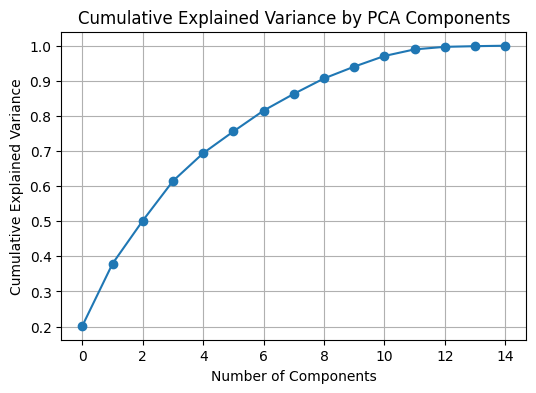

PCA components retained: 11

LASSO RESULTS:
Optimal alpha: 0.06587
R²: 0.563, RMSE: 1.542393

Non-zero LASSO Coefficients:
XLK    0.349854
QQQ    0.246683
SPY    0.236189
TLT    0.031830
dtype: float64

XGBOOST RESULTS:
R²: 0.289, RMSE: 1.966478, MAE: 1.229847


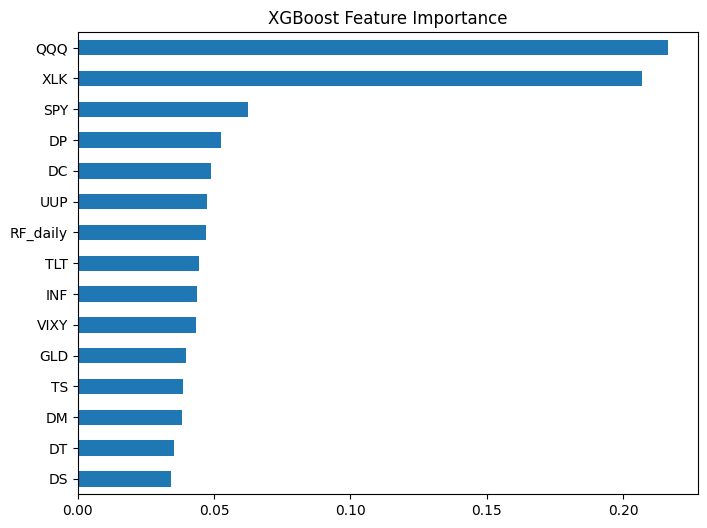


Model Performance Comparison:
            Model   R²_test  RMSE_test
0  OLS (baseline)  0.499000        NaN
1           LASSO  0.562600   1.542393
2         XGBoost  0.289004   1.966478


In [50]:
# ==========================================
# 1. PCA ANALYSIS
# ==========================================
pca = PCA().fit(X_train_scaled)

# Explained variance plot
plt.figure(figsize=(6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.show()

# Keep enough components for 95% variance
pca_95 = PCA(n_components=0.95)
X_train_pca = pca_95.fit_transform(X_train_scaled)
X_test_pca = pca_95.transform(X_test_scaled)
print(f"PCA components retained: {pca_95.n_components_}")

# ==========================================
# 2. LASSO REGRESSION (with CV)
# ==========================================
lasso = LassoCV(cv=10, random_state=42).fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lasso))

print("\nLASSO RESULTS:")
print(f"Optimal alpha: {lasso.alpha_:.5f}")
print(f"R²: {lasso_r2:.3f}, RMSE: {lasso_rmse:.6f}")

# Display selected variables
lasso_coef = pd.Series(lasso.coef_, index=cols)
print("\nNon-zero LASSO Coefficients:")
print(lasso_coef[lasso_coef != 0].sort_values(ascending=False))

# ==========================================
# 3. XGBOOST REGRESSOR
# ==========================================
xgb = XGBRegressor(
    n_estimators=500,
    learning_rate=0.03,
    max_depth=3,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

xgb_r2 = r2_score(y_test, y_pred_xgb)
xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)

print("\nXGBOOST RESULTS:")
print(f"R²: {xgb_r2:.3f}, RMSE: {xgb_rmse:.6f}, MAE: {xgb_mae:.6f}")

# Feature importance
importance = pd.Series(xgb.feature_importances_, index=cols).sort_values(ascending=True)
importance.plot(kind="barh", figsize=(8,6), title="XGBoost Feature Importance")
plt.show()

# ==========================================
# 4. PERFORMANCE COMPARISON
# ==========================================
results = pd.DataFrame({
    "Model": ["OLS (baseline)", "LASSO", "XGBoost"],
    "R²_test": [0.499, lasso_r2, xgb_r2],
    "RMSE_test": [np.nan, lasso_rmse, xgb_rmse]
})

print("\nModel Performance Comparison:")
print(results)

## Summary Interpretation

- The analysis shows that Apple’s daily returns are mainly driven by broad equity market factors.
PCA indicates strong multicollinearity among predictors — most information comes from a few underlying “market components.”
- LASSO improves model performance (R² = 0.56 vs. 0.50 for OLS) by keeping only the most relevant variables: XLK, QQQ, SPY, and slightly TLT.
- These represent Apple’s exposure to the tech sector, the Nasdaq, the overall market, and long-term interest rates.
- All macroeconomic variables were dropped, confirming they have little explanatory power at the daily frequency.
- XGBoost performs poorly (R² = 0.29), suggesting that the relationship is largely linear and that nonlinear patterns add no predictive value.

In short:
- AAPL’s returns are explained by a few correlated market indices; regularized linear models like LASSO capture this efficiently, while nonlinear methods do not improve accuracy.